# 여기부터 실행으로 시작

### pandas가 없는 사람은 다음 명령어를 cmd 창에 쳐서 설치해주세요
- pip install pandas
- conda install pandas

In [159]:
import requests
from flask import Flask , render_template, request
from bs4 import BeautifulSoup


keywords = df['name'][:3]
headers = {
           "X-Naver-Client-Id": "HyjmsprByr1fqs5XMH6j" ,
            "X-Naver-Client-Secret": "6ngV69kmfz"
        }
food_ls = []
for keyword in keywords:
    response=requests.get('https://openapi.naver.com/v1/search/image?query={}&display=2&start=1&sort=sim&filter=all'.format(keyword),headers=headers)
    # print(response)
    result=response.json()['items']
    print(result)
    print(keyword)
    for i in result:
        print(i['link'])
    
#     if 'news'not in result['link']:
#         food_ls.append(result['link'])
            
    
# for i in food_ls:
#     print(i)

[{'title': '진수미 맑은 어묵탕스프 500g : 겁나로켓', 'link': 'http://shop1.phinf.naver.net/20191205_95/15754755426498Pd3Q_JPEG/v1.jpg', 'thumbnail': 'https://search.pstatic.net/common/?src=http://shop1.phinf.naver.net/20191205_95/15754755426498Pd3Q_JPEG/v1.jpg&type=b150', 'sizeheight': '1000', 'sizewidth': '1000'}, {'title': '초스피드요리~ 어묵탕 맛있게 끓이는법', 'link': 'http://post.phinf.naver.net/20150630_292/hoya1378_14356357073045GQ9z_JPEG/mug_obj_201506301241483839.jpg', 'thumbnail': 'https://search.pstatic.net/common/?src=http://post.phinf.naver.net/20150630_292/hoya1378_14356357073045GQ9z_JPEG/mug_obj_201506301241483839.jpg&type=b150', 'sizeheight': '600', 'sizewidth': '900'}]
어묵탕
http://shop1.phinf.naver.net/20191205_95/15754755426498Pd3Q_JPEG/v1.jpg
http://post.phinf.naver.net/20150630_292/hoya1378_14356357073045GQ9z_JPEG/mug_obj_201506301241483839.jpg
[{'title': '낙지연포탕 만드는 법', 'link': 'http://post.phinf.naver.net/20161010_276/14760643855951CX1m_JPEG/IdukCOJ90U73Mj6oEydgsxM03qMI.jpg', 'thumbnail': 'https

## 1. 지식백과에서 메뉴 리스트 가져오기

In [2]:
def get_html(url):
    html = ''
    res = requests.get(url)
    if res.status_code == 200:
        res.encoding = 'utf-8'
        html = res.text
    return html

In [113]:
# 한 페이지의 메뉴 가져오는 코드 함수
def get_food(page):
    
    from bs4 import BeautifulSoup
    result = get_html('https://100.daum.net/tag/274?sort=vcnt&index=&page={}'.format(page))

    soup = BeautifulSoup(result, 'html.parser')
    nums = soup.select('#mArticle > div > ul > li > div > strong > a')
    food_ls = []
    for temp in nums:
        food_text=temp.text.strip()
        idx = food_text.find('(')
        if idx != -1:
            food_text=food_text[:idx-1]
        if ' ' not in food_text:
            food_ls.append(food_text)
    food_ls=pd.DataFrame(food_ls, columns=['name'])
    return food_ls


In [123]:
# 3초씩 쉬어가며 50페이지 크롤링 해오기
import time
a=get_food(1)
for i in range(2,51):
    b=get_food(i)
    a=pd.concat([a,b], axis=0)
    time.sleep(3)
    
a

name
0         어묵탕
1         연포탕
2         마라탕
3         두리안
4          노니
..        ...
11         짬뽕
12       가공식품
13       갈치속젓
14  미역팽이버섯초무침
15     우엉들깨조림

[700 rows x 1 columns]

In [124]:
# csv파일로 저장
a.to_csv('food2.csv', index=False, encoding='utf-8')

In [326]:
# 엑셀로 이상한 데이터 삭제 후 csv 파일로 만들었는데, 그 파일 가져오기 
df = pd.read_csv("food.csv", encoding ='utf-8')

In [130]:
#아래와 같이 데이터를 볼 수 있다
for i in df['name'][:3]:
    

어묵탕
연포탕
마라탕


In [330]:
#데이터 가져옴
import requests
from bs4 import BeautifulSoup
from pandas import DataFrame
keys= df['name']
img1 = []
img2 = []
for key in keys:
    result = get_html('https://search.naver.com/search.naver?where=image&sm=tab_jum&query={}'.format(key))
    soup = BeautifulSoup(result, 'html.parser')
    nums1 = soup.select_one('#_sau_imageTab > div.photowall._photoGridWrapper > div.photo_grid._box > div:nth-child(1) > a.thumb._thumb > img')
    nums2 = soup.select_one('#_sau_imageTab > div.photowall._photoGridWrapper > div.photo_grid._box > div:nth-child(2) > a.thumb._thumb > img')
    img1.append(nums1.attrs['data-source'])
    img2.append(nums2.attrs['data-source'])
    

In [332]:
# listf를 모두 dict로 변환하고 그걸 DataFrame으로 변환
dict_image = {'name' : df["name"], 'img1': img1, 'img2': img2}
link_df = DataFrame(dict_image, columns= ['name','img1', 'img2'])
link_df
# 

name                                               img1  \
0     어묵탕  https://search.pstatic.net/common/?src=http%3A...   
1     연포탕  https://search.pstatic.net/common/?src=http%3A...   
2     마라탕  https://search.pstatic.net/common/?src=http%3A...   
3     두리안  https://search.pstatic.net/common/?src=http%3A...   
4      노니  https://search.pstatic.net/common/?src=http%3A...   
..    ...                                                ...   
311  녹차라떼  https://search.pstatic.net/common/?src=http%3A...   
312  카스텔라  https://search.pstatic.net/common/?src=http%3A...   
313   컵라면  https://search.pstatic.net/common/?src=http%3A...   
314   초콜릿  https://search.pstatic.net/common/?src=http%3A...   
315    짬뽕  https://search.pstatic.net/common/?src=http%3A...   

                                                  img2  
0    https://search.pstatic.net/common/?src=http%3A...  
1    https://search.pstatic.net/common/?src=http%3A...  
2    https://search.pstatic.net/common/?src=http%3A...  
3    https://search.pstatic.net/common/?src=http%3A...  
4    https://search.pstatic.net/common/?src=http%3A...  
..                                                 ...  
311  https://search.pstatic.net/common/?src=http%3A...  
312  https://search.pstatic.net/common/?src=http%3A...  
313  https://search.pstatic.net/common/?src=http%3A...  
314  https://search.pstatic.net/common/?src=http%3A...  
315  https://search.pstatic.net/common/?src=http%3A...  

[316 rows x 3 columns]

In [345]:
link_df.to_csv('food2.csv', index=False, encoding='utf-8')

In [346]:
link_df.to_csv('food3.csv', index=False, encoding='euc-kr')

# 여기부터 실행
- 이미지 보고 파일 고르기
- 둘중에 좋은 이미지 엑셀에 남기기

In [347]:
# 최종 이미지 링크 파일 가져오기
imgs = pd.read_csv("food3.csv", encoding ='euc-kr')

In [348]:
imgs.head()

name                                               img1  \
0  어묵탕  https://search.pstatic.net/common/?src=http%3A...   
1  연포탕  https://search.pstatic.net/common/?src=http%3A...   
2  마라탕  https://search.pstatic.net/common/?src=http%3A...   
3  두리안  https://search.pstatic.net/common/?src=http%3A...   
4   노니  https://search.pstatic.net/common/?src=http%3A...   

                                                img2  
0  https://search.pstatic.net/common/?src=http%3A...  
1  https://search.pstatic.net/common/?src=http%3A...  
2  https://search.pstatic.net/common/?src=http%3A...  
3  https://search.pstatic.net/common/?src=http%3A...  
4  https://search.pstatic.net/common/?src=http%3A...

2 어묵탕


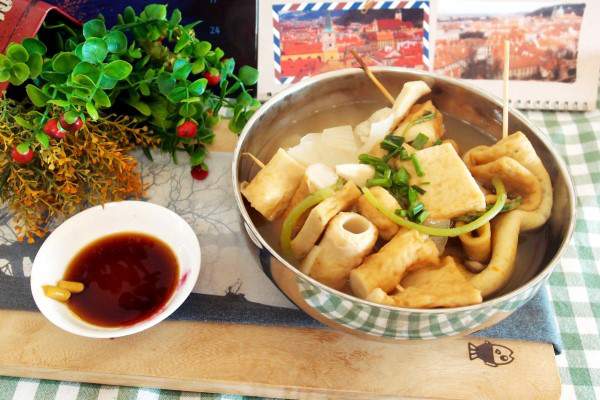

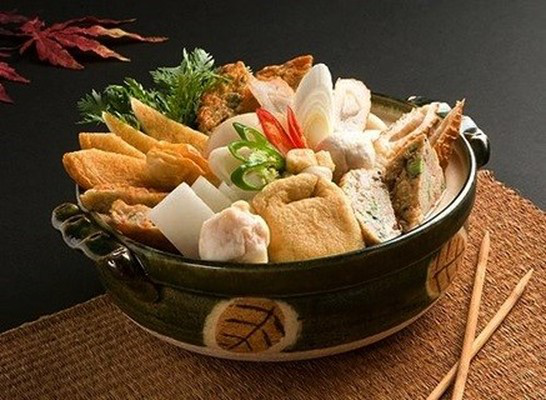

3 연포탕


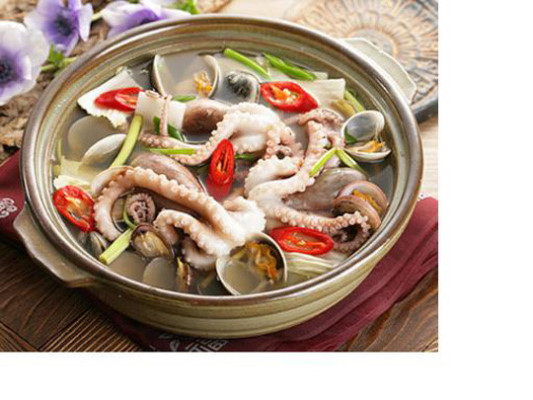

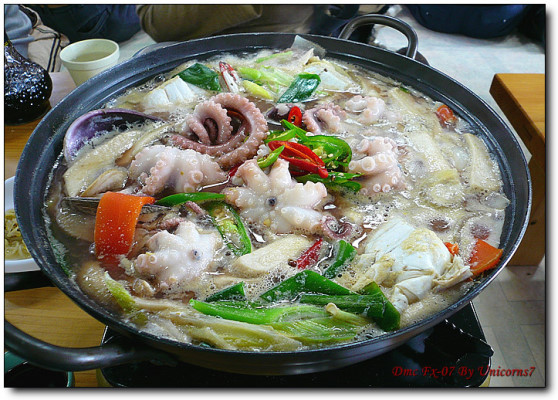

4 마라탕


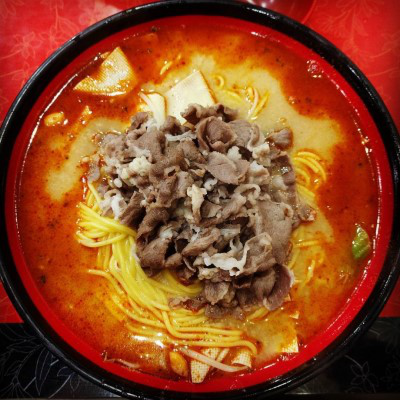

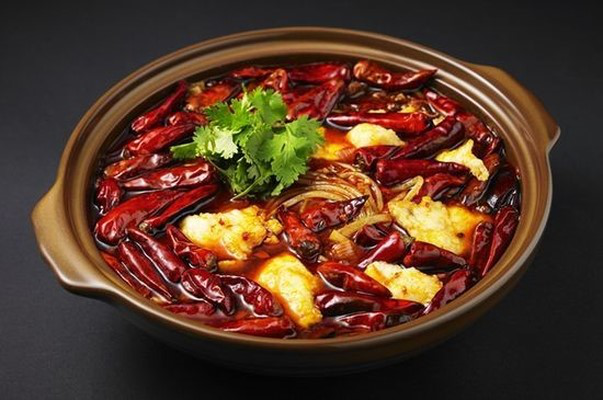

5 두리안


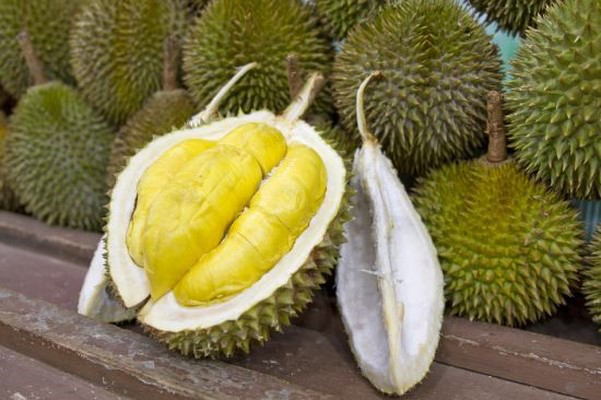

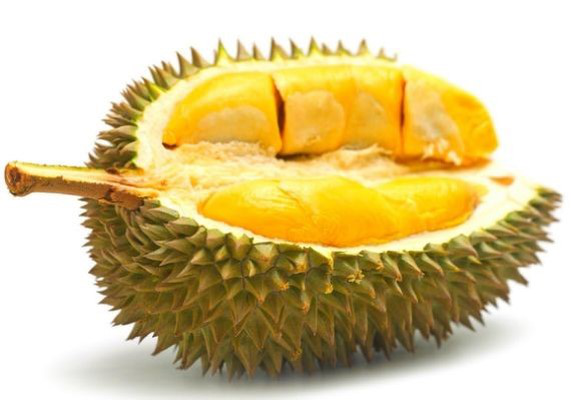

6 노니


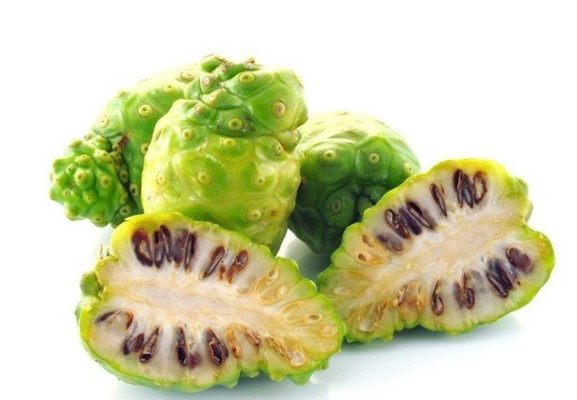

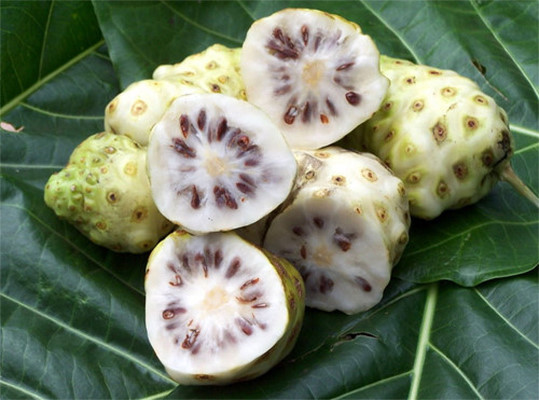

7 라면


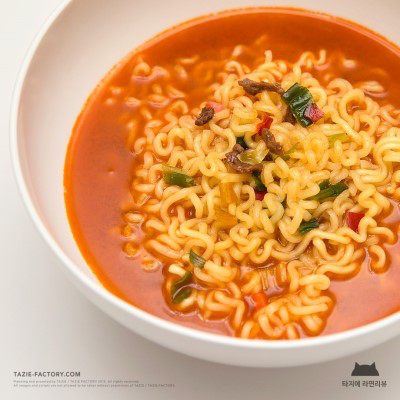

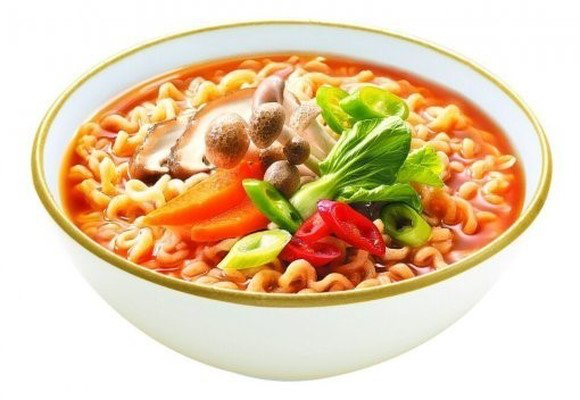

8 오이냉국


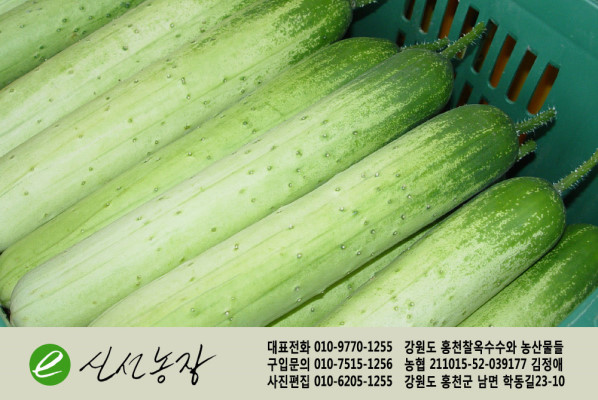

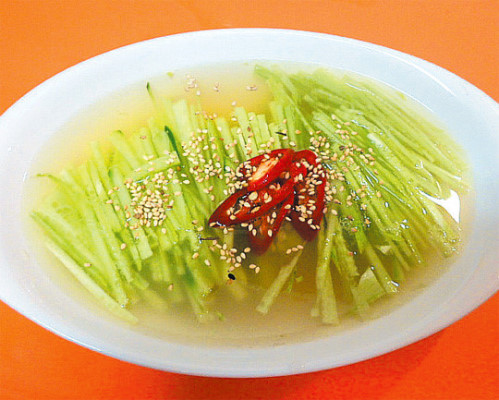

9 깻잎전


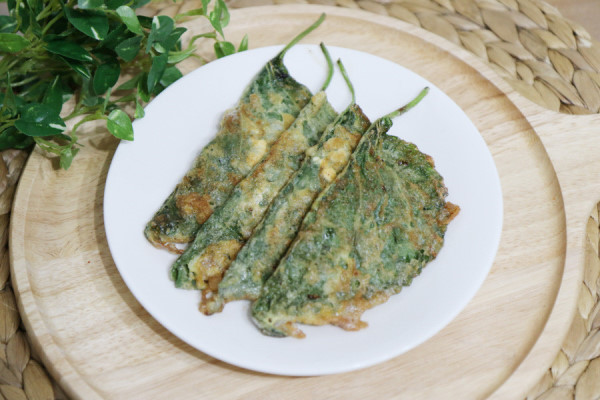

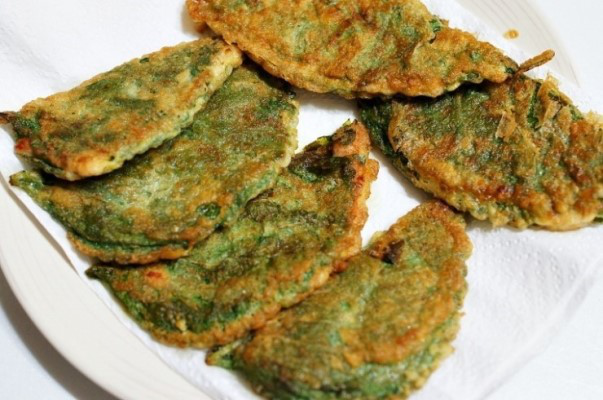

10 감자


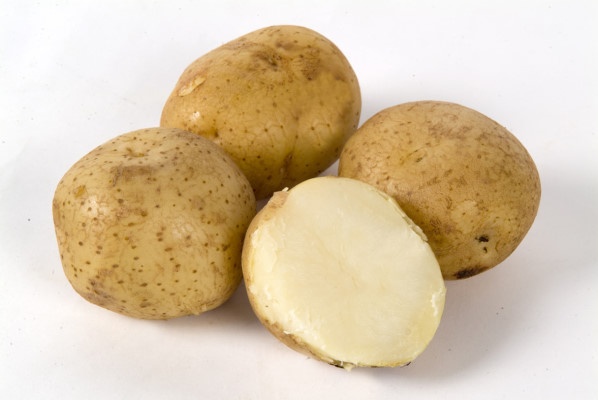

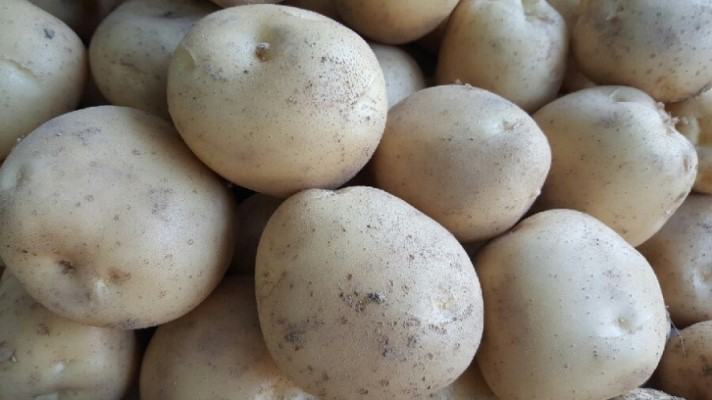

11 훠궈


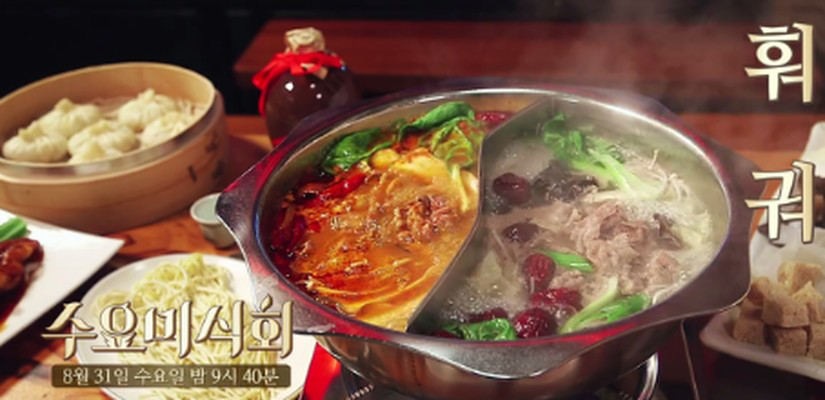

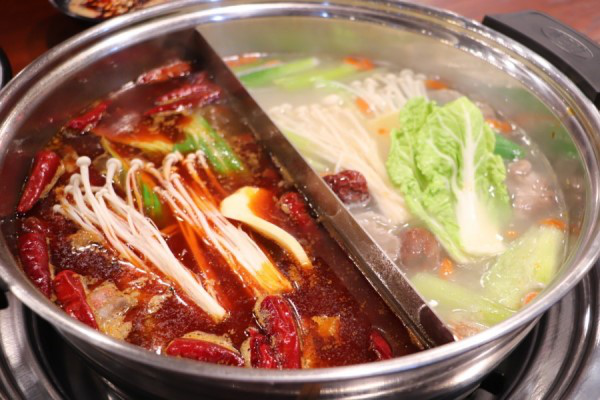

In [349]:
from PIL import Image 
import requests
from io import BytesIO
for i in range(10):
    img = imgs.iloc[i]
    name = img['name']
    url1 = requests.get(img['img1'])
    url2 = requests.get(img['img2'])
    img1 = Image.open(BytesIO(url1.content))
    img2 = Image.open(BytesIO(url2.content))
    print(i+2,name)
    display(img1)
    display(img2)